### Codio Activity 10.5: ACF and PACF Plots for ARMA Models

**Expected Time: 60 Minutes**

**Total Points: 70**

This assignment focuses on using the autocorrelation and partial autocorrelation plots to determine parameters for stationary data.  In general, you will first determine the stationarity of a time series using the Dickey Fuller test (or eyeballing it) and then examine the autocorrelation and partial autocorrelation to identify the parameters for each term.

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import warnings

In [2]:
warnings.filterwarnings('ignore')

### The Data

Two datasets are used to examine stationarity and autoregression and moving average components for ARMA models.  The first is the recruits data, encountered earlier.  The second is a series of Quarterly GNP data from the United States from 1947 through 2002. In the first you predict the number of recruits and the second your target is the difference of the logarithm of the GNP. 

In [3]:
recruits = pd.read_csv('data/recruitment.csv', index_col=0)

In [4]:
recruits.head()

,value
1950-01-01,68.63
1950-02-01,68.63
1950-03-01,68.63
1950-04-01,68.63
1950-05-01,68.63


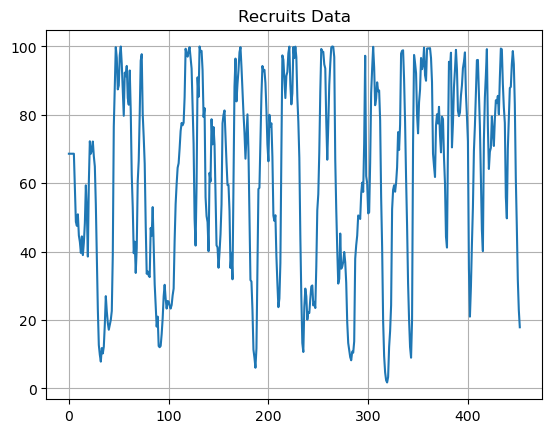

In [5]:
plt.plot(recruits.values)
plt.grid()
plt.title('Recruits Data');

[Back to top](#-Index)

### Problem 1

#### Is it Stationary? 

**10 Points**

As discussed, our ARMA models are only applicable for stationary data.  Use the `adfuller` function to determine if the recruits data is stationary at the 0.05 level.  Assign your answer as a string to `ans1` below.  

In [6]:
### GRADED
# Perform the test
result = adfuller(recruits)

# Extract and print the results
adf_statistic, p_value, used_lag, n_obs, critical_values, ic_best = result
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Critical Values: {critical_values}')
# Determine stationarity
if p_value < 0.05:
    ans1 = "yes"
else:
    ans1 = "no"

# Answer check
print(ans1)
print(type(ans1))

ADF Statistic: -6.239970407069512
p-value: 4.723381272810701e-08
Critical Values: {'1%': -3.445299682487321, '5%': -2.8681312035123967, '10%': -2.570280872933884}
yes
<class 'str'>


[Back to top](#-Index)

### Problem 2

#### Building train and test set

**10 Points**

Now, we use the familiar `train_test_split` and set `shuffle = False` to create a temporal train and test set.  Leave all arguments to default except `shuffle`.  Assign your results as `y_hist` and `y_future` below. 

In [7]:
### GRADED
y = pd.DataFrame(recruits)
y_hist, y_future = train_test_split(y, shuffle = False)

# Answer check
print("History\n=========")
print(y_hist.tail())
print("Future\n==========")
print(y_future.head())

History
               value
1977-11-01  98.74000
1977-12-01  98.88000
1978-01-01  90.41001
1978-02-01  77.86000
1978-03-01  61.48000
Future
            value
1978-04-01  47.66
1978-05-01  30.74
1978-06-01  20.11
1978-07-01  12.08
1978-08-01   8.97


[Back to top](#-Index)

### Problem 3

#### Examining acf and pacf

**10 Points**

Below, the ACF and PACF plots are shown.  While the ACF plot isn't incredibly helpful, the PACF may suggest using a value of `p = 1` in an ARMA model.  As such, create and fit an ARIMA model with `p = 1` and `q = 1`.  Assign your fit model as `arma` below.

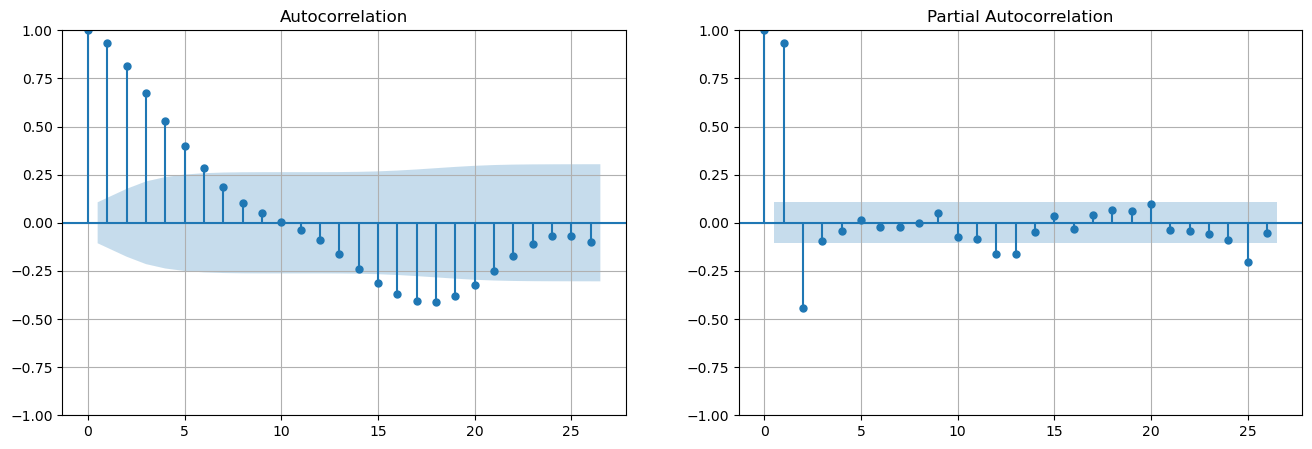

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(y_hist, ax = ax[0]);
ax[0].grid()
plot_pacf(y_hist, ax = ax[1], method = 'ywm');
ax[1].grid()

In [9]:
y_hist.index = pd.to_datetime(y_hist.index)

In [10]:
y_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 339 entries, 1950-01-01 to 1978-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   339 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [11]:
### GRADED

# Create the model
arma = ARIMA(y_hist, order=(1,0,1))

# Fit the model
results = arma.fit()

# Print summary of results
print(results.summary())

# Answer check
print(arma)

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  339
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1240.570
Date:                Wed, 25 Sep 2024   AIC                           2489.141
Time:                        22:55:11   BIC                           2504.445
Sample:                    01-01-1950   HQIC                          2495.239
                         - 03-01-1978                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.0530      6.727      8.630      0.000      44.868      71.238
ar.L1          0.8934      0.032     27.754      0.000       0.830       0.957
ma.L1          0.3722      0.044      8.400      0.0

From these Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots, we can derive several insights about the time series data:

Autocorrelation (ACF) plot:

Shows a strong positive autocorrelation at lag 1, gradually decreasing over subsequent lags.
The pattern suggests a trend or persistence in the data.
The slow decay in autocorrelation is indicative of an AR (Autoregressive) process.
There's a cyclic pattern visible, suggesting possible seasonality in the data.


Partial Autocorrelation (PACF) plot:

Shows a significant spike at lag 1, then mostly insignificant values afterwards.
This pattern is characteristic of an AR(1) process.


ARMA model suggestion:

The question suggests using an ARMA model with p = 1 and q = 1.
This means an ARMA(1,1) model is recommended, which combines both AR(1) and MA(1) components.


Interpretation:

The AR(1) component (p = 1) captures the strong dependency on the immediately preceding value.
The MA(1) component (q = 1) accounts for some of the residual errors not explained by the AR part.


Potential seasonality:

The cyclical pattern in the ACF plot might indicate a seasonal component, which could be addressed with a seasonal ARIMA (SARIMA) model if needed.


Model adequacy:

While the ARMA(1,1) model is suggested, it's important to note that this might be a simplification. The cyclic pattern in the ACF suggests that a more complex model (possibly including seasonal components) might be necessary for a comprehensive fit.

[Back to top](#-Index)

### Problem 4

#### Making Predictions

**10 Points**

Use the `arma` object to make predictions for the training data.  Assign these results as `hist_preds` below.  Uncomment the code to view a plot of the results against the original series. 

1977-11-01    100.628693
1977-12-01     93.700356
1978-01-01     96.456426
1978-02-01     84.710623
1978-03-01     73.198915
Freq: MS, Name: predicted_mean, dtype: float64


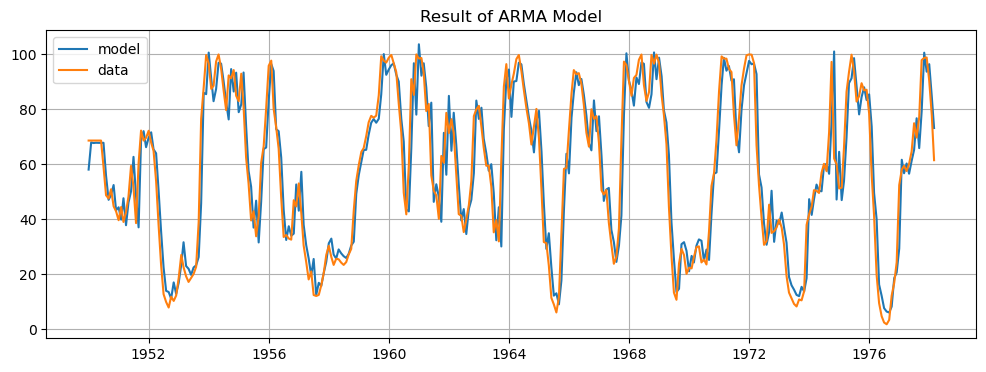

In [12]:
### GRADED

# Assuming y_future has the length of the future period you want to forecast
n_steps = len(y_future)

# Make predictions for the entire historical data
hist_preds = results.get_prediction(start=y_hist.index[0], end=y_hist.index[-1])
hist_preds = hist_preds.predicted_mean

# Answer check
print(hist_preds.tail())
plt.figure(figsize = (12, 4))
plt.plot(hist_preds, label = 'model')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

[Back to top](#-Index)

### Problem 5

#### Forecasting with the ARMA model

**10 Points**

Finally, to use the forecasting capabilities of the model, pass the number of steps to forecast in the future.  Assign the forecast into the future to match up with `y_future` values as `future_preds` below.  

In [13]:
y_future.index = pd.to_datetime(y_future.index)

In [14]:
### GRADED

# Assuming y_future contains the dates for which you want to forecast
steps = len(y_future)

# Make forecasts
future_preds = results.forecast(steps=steps)

# Answer check
print(future_preds.tail())
print(y_future.tail())

1987-05-01    58.053023
1987-06-01    58.053024
1987-07-01    58.053024
1987-08-01    58.053025
1987-09-01    58.053025
Freq: MS, Name: predicted_mean, dtype: float64
            value
1987-05-01  61.42
1987-06-01  47.47
1987-07-01  31.81
1987-08-01  22.95
1987-09-01  17.87


In [15]:
#### Model doesn't seem to have much predicting power

# Combine historical and future predictions
combined_preds = hist_preds.append(future_preds)

plt.figure(figsize=(12, 4))
plt.plot(combined_preds, label='model')
plt.plot(y_hist, label='data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model Forecast')
plt.show()

AttributeError: 'Series' object has no attribute 'append'

[Back to top](#-Index)

### Problem 6

#### The GNP series

**10 Points**

Below, the `gnp` data is loaded and displayed.  This data is transformed according to the first difference of the logarithm so as to form a stationary series.  Then, the ACF and PACF plots are shown on the stationary series.  These suggest that an AR(2) and MA(2) model might be appropriate.  Build an `ARIMA` model on `y` and predict as `preds`.  Uncomment the code to visualize the predictions.

In [24]:
gnp = pd.read_csv('data/gnp.csv', index_col=0)
gnp.index = pd.Index(pd.date_range("1947-Q1", "2002-Q4", freq = "Q"))
gnp.head()

,value
1947-03-31,1488.9
1947-06-30,1496.9
1947-09-30,1500.5
1947-12-31,1524.3
1948-03-31,1546.6


<AxesSubplot:>

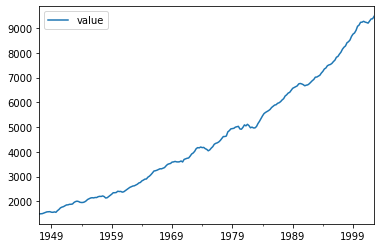

In [25]:
gnp.plot()

In [26]:
y = np.log(gnp).diff().dropna()

In [27]:
#note the stationarity
adfuller(y)

(-10.291967758822777,
 3.550732270832684e-18,
 0,
 221,
 {'1%': -3.4602906385073884,
  '5%': -2.874708679520702,
  '10%': -2.573788599127782},
 -1350.8710047523716)

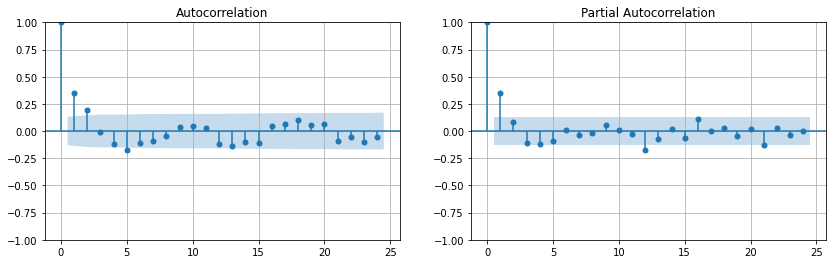

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
plot_acf(y, ax = ax[0]);
ax[0].grid()
plot_pacf(y, ax = ax[1])
ax[1].grid();

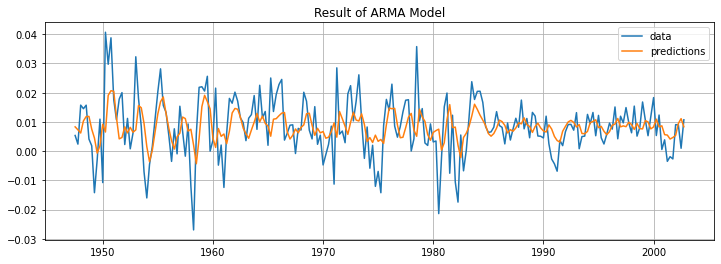

In [47]:
### GRADED

arma2 = ARIMA(y, order=(2,0,2)).fit()
results2 = arma2
preds = results2.get_prediction()

# # Answer check
plt.figure(figsize = (12, 4))
plt.plot(y, label = 'data')
plt.plot(preds.predicted_mean, label = 'predictions')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

[Back to top](#-Index)

### Problem 7

#### Errors and Autocorrelation

**10 Points**

Below, subtract the predictions from the actual series.  Determine the stationarity of the results by examining the autocorrelation plot of the residuals.  Is there structure remaining in the series based on this?  Assign your answer as a string to `ans7` below -- 'yes' or 'no'.

In [48]:
preds = pd.DataFrame(preds.predicted_mean)
preds.columns = ['value']

1947-06-30    0.008306
1947-09-30    0.007296
1947-12-31    0.006210
1948-03-31    0.010330
1948-06-30    0.011826
                ...   
2001-09-30    0.004664
2001-12-31    0.005392
2002-03-31    0.009466
2002-06-30    0.011114
2002-09-30    0.008346
Freq: Q-DEC, Name: value, Length: 222, dtype: float64


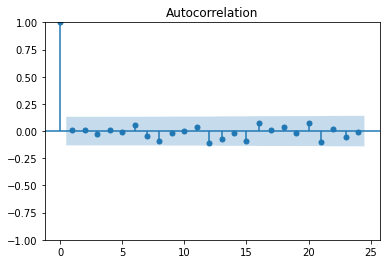

In [49]:
### GRADED
# print(y)
print(preds['value'])
resids = y - preds
ans7 = 'no'

# Answer check
plot_acf(resids);